In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from pprint import pprint as pp
import networkx as nx

In [2]:
!qbraid jobs enable amazon_braket

You have already enabled qBraid Quantum Jobs in the amazon_braket environment.


In [169]:
from braket.ahs.atom_arrangement import AtomArrangement
from braket.pulse import GaussianWaveform
from braket.ahs.driving_field import DrivingField
from braket.ahs.shifting_field import ShiftingField
from braket.ahs.field import Field
from braket.devices import LocalSimulator
from braket.timings.time_series import TimeSeries
import time
import numpy as np
from quera_ahs_utils.plotting import show_register
import matplotlib.pyplot as plt

a = 6.1e-6  # meters

points = [(-0.05080017,-4.22464),
(-0.09080017,-3.5686402),
(-0.11080017,-2.91264),
(-0.11080017,-2.25664),
(-0.09080017,-1.6006403),
(-0.11080017,-0.9446402),
(-0.15080017,-0.28864014),
(-2.2908,0.3673596),
(2.6692,-1.6006403),
(0.009199829,1.6793598),
(-0.030800171,2.3353596),
(-0.05080017,2.99136),
(-0.09080017,3.6473596),
(0.7291998,-3.5686402),
(1.5891998,-3.5686402),
(2.3091998,-3.5686402),
(-0.99080014,-3.5686402),
(-1.8308002,-3.5686402),
(-2.6908002,-3.5686402),
(0.82919985,-2.25664),
(-2.1108003,-4.22464),
(2.2691998,-2.91264),
(-1.9108002,-2.91264),
(-2.5108001,-2.25664),
(-1.5108001,-2.25664),
(0.8091998,-4.22464),
(-2.8908002,-1.6006403),
(1.5291998,-2.91264),
(0.6291998,-2.91264),
(3.9891999,-2.25664),
(2.7691998,-4.22464),
(2.1291997,-2.25664),
(1.8891999,-4.22464),
(3.4091997,-3.5686402),
(-3.4308002,-2.91264),
(-4.4108,-2.91264),
(-3.8108,-2.25664),
(2.9692,-2.91264),
(3.1291997,-2.25664),
(3.9091997,-2.91264),
(-1.0108001,-2.91264),
(0.76919985,-0.9446402),
(0.94919986,-0.28864014),
(1.7891998,-0.28864014),
(1.9291998,-0.9446402),
(2.7491999,-0.28864014),
(1.7491999,0.3673596),
(1.3091998,1.02336),
(2.4492,1.02336),
(-1.0708002,-0.9446402),
(3.3891997,-0.9446402),
(3.9292,-1.6006403),
(3.0491998,0.3673596),
(-1.5308002,-0.28864014),
(-1.8908001,-1.6006403),
(-2.9108002,-0.9446402),
(-2.4708002,-0.28864014),
(-0.91080016,-1.6006403),
(-3.3708003,-0.28864014),
(-3.8908002,-0.9446402),
(-3.5708,0.3673596),
(-2.1708002,-0.9446402),
(1.4091998,-1.6006403),
(-2.7708,-2.91264),
(-3.7908,-1.6006403),
(0.8691998,2.3353596),
(1.5091999,1.6793598),
(1.7891998,2.3353596),
(2.2891998,2.99136),
(1.7291999,3.6473596),
(3.0091999,3.6473596),
(2.9492,2.3353596),
(3.2092,1.6793598),
(3.6692,2.3353596),
(3.6692,3.6473596),
(2.2691998,4.30336),
(1.1491998,2.99136),
(-0.91080016,2.3353596),
(-1.8908001,2.3353596),
(-1.2308002,1.6793598),
(-1.7708001,2.99136),
(-1.0508002,2.99136),
(-2.8508003,2.3353596),
(-2.5908003,2.99136),
(-2.3308,3.6473596),
(-3.4708002,2.99136),
(-3.1308002,3.6473596),
(-3.9508002,2.3353596),
(-3.4108002,1.6793598),
(-2.2708,1.6793598),
(-2.9708002,1.02336),
(-0.79080015,4.30336),
(-0.17080016,4.9593596),
(-0.41080016,5.6153593),
(0.48919982,4.30336),
(0.8691998,4.9593596),
(-1.0108001,4.9593596),
(0.26919982,5.6153593),
(2.4292,1.6793598),
(3.6491997,2.99136),
]

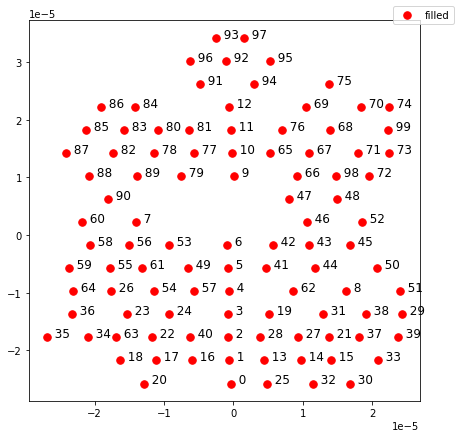

In [170]:
register = AtomArrangement()
for x,y in points:
    # print(round(a*x, 10), round(a*y, 10))
    register.add([round(a*x, 7),round(a*y, 7)])

fig = show_register(register)
plt.show()

In [171]:
from braket.ahs.hamiltonian import Hamiltonian

H = Hamiltonian()

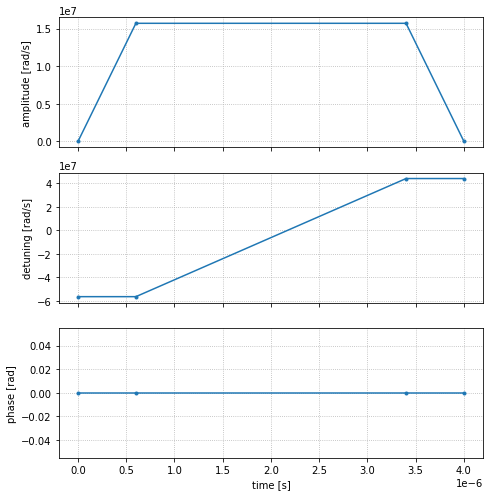

In [161]:
from quera_ahs_utils.plotting import show_global_drive 
from quera_ahs_utils.drive import get_drive

omega_min = 0       
omega_max = 2.5e6 * 2 * np.pi
detuning_min = -9e6 * 2 * np.pi
detuning_max = 7e6 * 2 * np.pi

time_max = 4e-6
time_ramp = 0.15*time_max

time_points = [0, time_ramp, time_max - time_ramp, time_max]
time_points = [round(x, 9) for x in time_points]
omega_values = [omega_min, omega_max, omega_max, omega_min]
omega_values = [o-(o%400) for o in omega_values]
detuning_values = [detuning_min, detuning_min, detuning_max, detuning_max]
detuning_values = [(d*10-((d*10)%2))/10 for d in detuning_values]
phase_values = [0, 0, 0, 0]

drive = get_drive(time_points, omega_values, detuning_values, phase_values)
H += drive

show_global_drive(drive)
plt.show()

In [123]:
from braket.aws import AwsDevice

qpu = AwsDevice("arn:aws:braket:us-east-1::device/qpu/quera/Aquila")

# Capabilities, constraints and performance metrics are stored as 'paradigm' attribute of AwsDevice.
capabilities = qpu.properties.paradigm
pp(capabilities.dict())

# get C6 coefficient in rad m^6/sec Pull from capabilities attribute


C6 = float(capabilities.rydberg.dict()['c6Coefficient'])

{'braketSchemaHeader': {'name': 'braket.device_schema.quera.quera_ahs_paradigm_properties',
                        'version': '1'},
 'lattice': {'area': {'height': Decimal('0.000076'),
                      'width': Decimal('0.000075')},
             'geometry': {'numberSitesMax': 256,
                          'positionResolution': Decimal('1E-7'),
                          'spacingRadialMin': Decimal('0.000004'),
                          'spacingVerticalMin': Decimal('0.000004')}},
 'performance': {'lattice': {'positionErrorAbs': Decimal('1E-7')},
                 'rydberg': {'rydbergGlobal': {'rabiFrequencyErrorRel': Decimal('0.02')}}},
 'qubitCount': 256,
 'rydberg': {'c6Coefficient': Decimal('5.42E-24'),
             'rydbergGlobal': {'detuningRange': (Decimal('-125000000.0'),
                                                 Decimal('125000000.0')),
                               'detuningResolution': Decimal('0.2'),
                               'detuningSlewRateMax': Decimal(

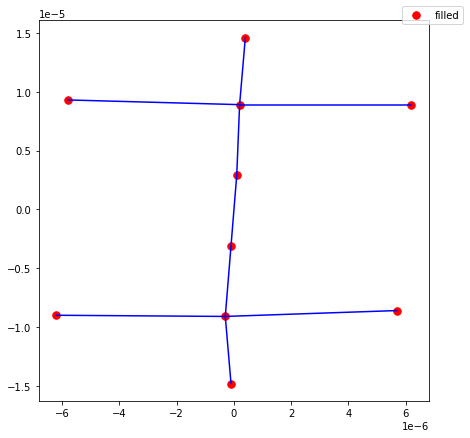

In [124]:
from braket.ahs.analog_hamiltonian_simulation import AnalogHamiltonianSimulation

show_register(register,blockade_radius = a,show_atom_index=False)

ahs_program = AnalogHamiltonianSimulation(
    register=register, 
    hamiltonian=drive
)

In [98]:
def save_result_json(json_file,result):
    '''
    Helper function to save results locally
    '''
    result_dict = {"measurements":[]}
    for measurement in result.measurements:
        shot_result = {
            "pre_sequence":[int(qubit) for qubit in measurement.pre_sequence],
            "post_sequence":[int(qubit) for qubit in measurement.post_sequence]
                      } 
        result_dict["measurements"].append(shot_result)

    with open(json_file,"w") as io:
        json.dump(result_dict,io,indent=2)

def open_json(json_file):
    '''
    Helper function to load and open json data
    '''
    with open(json_file,"r") as io:
        return json.load(io)


In [99]:
#raise BaseException("Only run this cell when you are ready to submit your job.")

from braket.aws import AwsDevice
qpu = AwsDevice("arn:aws:braket:us-east-1::device/qpu/quera/Aquila")

nshots = 50
task = qpu.run(ahs_program, shots=nshots)
print(task)

save_result_json("five_flower_inverted_two.json",task.result())
result = task.result()

AwsQuantumTask('id/taskArn':'arn:aws:braket:us-east-1:592242689881:quantum-task/cbf75a09-f90c-496f-aa45-25568325f565')


In [127]:
from braket.aws import AwsQuantumTask

In [128]:
task = AwsQuantumTask(arn="arn:aws:braket:us-east-1:592242689881:quantum-task/16c888fa-8365-4d63-aeea-9bca984931ae")

In [129]:
task.cancel()

KeyError: 'cancellationStatus'

In [172]:
result = open_json("more_connected_inverted_tree.json")

In [173]:
from braket.ahs.atom_arrangement import AtomArrangement
import numpy as np
from quera_ahs_utils.plotting import show_register
import matplotlib.pyplot as plt
from itertools import product
from collections import Counter
from copy import deepcopy
from braket.aws import AwsDevice
import json

In [174]:
def check_graph(graph_dict):
    for vertex in graph_dict:
        # Check for ground state atoms that could be Rydberg
        if(graph_dict[vertex][0] == 1):
            fail = True
            for a in graph_dict[vertex][1]:
                if(graph_dict[a][0] == 0):
                    fail = False
            if(fail):
                # print("DEATH")
                return False
            
        # Check for adjacent Rydberg atoms
        elif(graph_dict[vertex][0] == 0):
            # print(graph_dict[vertex])
            for a in graph_dict[vertex][1]:
                if(graph_dict[a][0] == 0):
                    # print("DEATH")
                    return False
    return True

def adj_check(graph_dict):
    for vertex in graph_dict:
        # Check for adjacent Rydberg atoms
        if(graph_dict[vertex][0] == 0):
            # print(graph_dict[vertex])
            for a in graph_dict[vertex][1]:
                if(graph_dict[a][0] == 0):
                    # print("DEATH")
                    return True
    return False

def postprocessing(graph_dict):
    if(check_graph(graph_dict)):
        return graph_dict
    for vertex in graph_dict:
        # Check for adjacent Rydberg atoms and set them both to ground
        if(graph_dict[vertex][0] == 0):
            for a in graph_dict[vertex][1]:
                if(graph_dict[a][0] == 0):
                    graph_dict[vertex][0] = 1
                    graph_dict[a][0] = 1
                    break
    available_vertices = []
    for vertex in graph_dict:    
        if(graph_dict[vertex][0] == 1):
            available = True
            for a in graph_dict[vertex][1]:
                if(graph_dict[a][0] == 0):
                    available = False
            if(available):
                available_vertices.append(vertex)
                
    # Discard sufficienly bad graphs that become computationally intractable
    if(len(available_vertices) > 20):
        print("Intractable")
        return None
    
    for bits in product([0,1], repeat=len(available_vertices)):
        test_graph = graph_dict
        for vertex in range(len(available_vertices)):
            test_graph[available_vertices[vertex]][0] = bits[vertex]
        if(adj_check(test_graph)):
            continue
        if(check_graph(test_graph)):
            return test_graph
        # else:
            # print(test_graph)
        # print(test_graph)

    return None

def points_to_unit_graph(scale=1, atom_list=[]):
    edge_dict = {}
    for i in range(len(atom_list)):
        for j in range(len(atom_list)):
            if(j == i):
                continue
            if np.sqrt((atom_list[i][0]-atom_list[j][0])**2 + (atom_list[i][1]-atom_list[j][1])**2) <= scale:
                if(i in edge_dict):
                    edge_dict[i].append(j)
                else:
                    edge_dict[i] = [j]
    # print(edge_dict)
    return nx.from_dict_of_lists(edge_dict)
def scale_units(atom_pos, scale=4.0*1e-6):
    out = []
    for a in atom_pos:
        out.append(a[0] * scale, a[1] * scale)

In [175]:
graph = points_to_unit_graph(atom_list=points, scale=1)

In [176]:
i = 0
post_process_result = deepcopy(result)
# print(final_registers.measurements)
bad_measurements = []
for shot in post_process_result["measurements"]:
    colored_graph = nx.to_dict_of_dicts(graph)
    for s in range(len(shot["post_sequence"])): 
        colored_graph[s] = [shot["post_sequence"][s] if shot["pre_sequence"][s] == 1 else 2 ,colored_graph[s]]
    clean_graph = postprocessing(colored_graph)
    if(clean_graph == None):
        bad_measurements.append(i)
    else:
        for vertex in clean_graph:
            post_process_result["measurements"][i]["post_sequence"][vertex] = clean_graph[vertex][0]
    i = i+1
len(bad_measurements)

Intractable
Intractable
Intractable


3

In [177]:
final_results = []
for i,result in enumerate(post_process_result["measurements"]):
    if not i in bad_measurements:
        final_results.append(result)
    

Most Frequent:  36
Best:  39
Independent set of 0-th most likely outcome


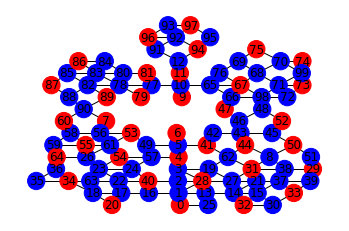

In [178]:
states = ['e', 'r', 'g']
state_labels = []
for shot in final_results:
    pre = shot["pre_sequence"]
    post = shot["post_sequence"]
    state_idx = np.array(pre) * (1 + np.array(post))
    state_labels.append("".join([states[s_idx] for s_idx in state_idx]))

occurence_count = Counter(state_labels)
most_frequent_regs = occurence_count.most_common(5)

most_frequent_regs = occurence_count.most_common(5)
# print(most_frequent_regs[0][0].count("r"),most_frequent_regs[1][0].count("r"))
print("Most Frequent: ", most_frequent_regs[0][0].count("r"))
print("Best: ", max(state_labels, key=lambda x: x.count("r")).count("r"))
# for ii in range(len(most_frequent_regs)):
ii=0
fig, ax = plt.subplots()
vert_colors = ['red' if (most_frequent_regs[ii][0][i] == 'r') else 'blue' for i in range(len(most_frequent_regs[ii][0]))]
print(f'Independent set of {ii}-th most likely outcome')
nx.draw(graph, pos = {ii: points[ii] for ii in graph.nodes()}, ax=ax, with_labels=True, node_color=vert_colors)
plt.savefig("more_connected_inverted_tree.png")
plt.show()

In [135]:
rydbergCount = 0
shots = 0
for state in state_labels:
    rydbergCount = rydbergCount + state.count("r")
    shots = shots + 1
print("EV: ", rydbergCount / totalState)
print("Intractability Rate: ", len(bad_measurements) / 50)

EV:  33.891304347826086
Intractability Rate:  0.08
